# Laba 2. SDA (by Alina Kragel)

In [90]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as scs
import random
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import statsmodels.api as sm
import random

%matplotlib inline

Data Frame:

In [3]:
df = pd.read_csv(r"C:\Users\aowl2\OneDrive\Рабочий стол\var7.csv", delimiter=';', decimal=',')
print(df.shape)
df.info()
df.head(10)

(400, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      400 non-null    float64
 1   x2      400 non-null    float64
 2   x3      400 non-null    float64
 3   x4      400 non-null    float64
dtypes: float64(4)
memory usage: 12.6 KB


,x1,x2,x3,x4
0,2.129681,1.439458,1.781273,5.597965
1,0.572235,2.902113,3.068484,2.666525
2,1.303781,0.720650,1.659750,4.072094
3,-0.449557,0.010528,2.895687,2.645260
4,0.047289,2.251093,2.816285,3.236669
5,0.641085,1.920051,1.820439,1.802960
6,1.699260,-5.843470,0.716843,4.013191
7,2.298493,-1.537580,1.233963,6.345224
8,2.045103,2.292587,4.150068,5.524383
9,0.721078,-2.588911,1.863734,2.581714


Expected Values:

In [37]:
expected_values_vector = [df[column].mean() for column in df.columns]
expected_values_vector

[1.2881806669208484,
 -0.6310579754439509,
 2.0637769628580056,
 4.197912762267637]

In [5]:
df.cov()

,x1,x2,x3,x4
x1,2.592722,1.440446,0.003727,3.420350
x2,1.440446,9.975961,1.171184,1.999596
x3,0.003727,1.171184,0.966937,0.019250
x4,3.420350,1.999596,0.019250,4.899217


In [6]:
df.corr()

,x1,x2,x3,x4
x1,1.000000,0.283232,0.002354,0.959686
x2,0.283232,1.000000,0.377093,0.286023
x3,0.002354,0.377093,1.000000,0.008845
x4,0.959686,0.286023,0.008845,1.000000


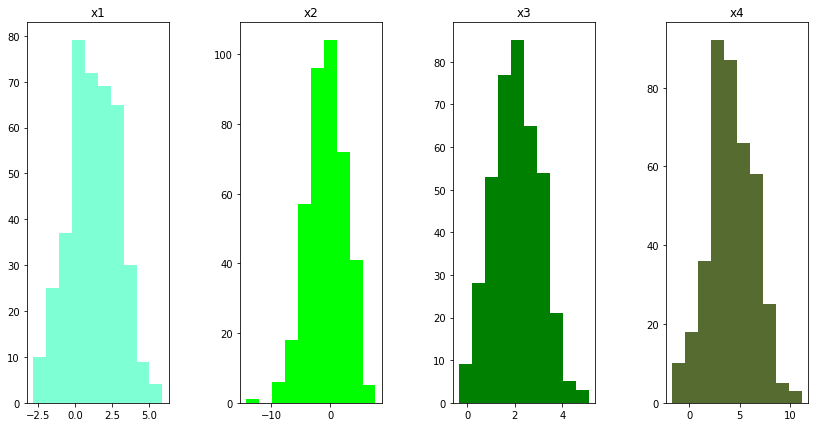

In [7]:
fig, axs = plt.subplots(1, 4, figsize=(14,7))
plt.subplots_adjust(wspace=0.5)
axs[0].hist(df['x1'], color = 'aquamarine')
axs[0].set_title('x1')
axs[1].hist(df['x2'], color='lime')
axs[1].set_title('x2')
axs[2].hist(df['x3'], color='green')
axs[2].set_title('x3')
axs[3].hist(df['x4'], color='darkolivegreen')
axs[3].set_title('x4')
plt.show() # по 2 лучше

In [87]:
df_np = df.to_numpy()
columns_list = [[line[i] for line in df_np] for i in range(len(df_np[0]))]

In [32]:
def test(test:callable):
    tests = [test(c) for c in columns_list]
    return pd.DataFrame({ "statistic" : [element.statistic for element in tests],
                         "p-value" : [element.pvalue for element in tests]},
                        index=['x1','x2','x3','x4'])

Тест Харке-Бера

In [41]:
test(lambda x: scs.jarque_bera(x))

,statistic,p-value
x1,1.694388,0.428616
x2,3.704649,0.156872
x3,1.567058,0.456791
x4,0.142187,0.931375


Тест Колмагорова-Смирнова

In [42]:
test(lambda x: scs.kstest(x,'norm', args=(np.mean(x), np.std(x))))

,statistic,p-value
x1,0.030808,0.830643
x2,0.025028,0.958198
x3,0.026272,0.938440
x4,0.035339,0.686270


Тест Шапиро-Уилка:

In [45]:
test(lambda x :scs.shapiro(x))

,statistic,p-value
x1,0.996135,0.441365
x2,0.993552,0.086048
x3,0.996425,0.515168
x4,0.996276,0.476468


Эллипсы концентрации

In [73]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [141]:
def conc_ellipse(x,y,title=None):
    fig, ax = plt.subplots(figsize=(9, 9))
    ax.scatter(x, y)
    confidence_ellipse(x, y, ax, n_std=1, edgecolor='aquamarine', linewidth=3)
    confidence_ellipse(x, y, ax, n_std=2, edgecolor='lime',linewidth=3)
    confidence_ellipse(x, y, ax, n_std=3, edgecolor='green',linewidth=3)
    ax.plot(x, y,'o', color = 'black')
    ax.set_title(title)
    plt.show()

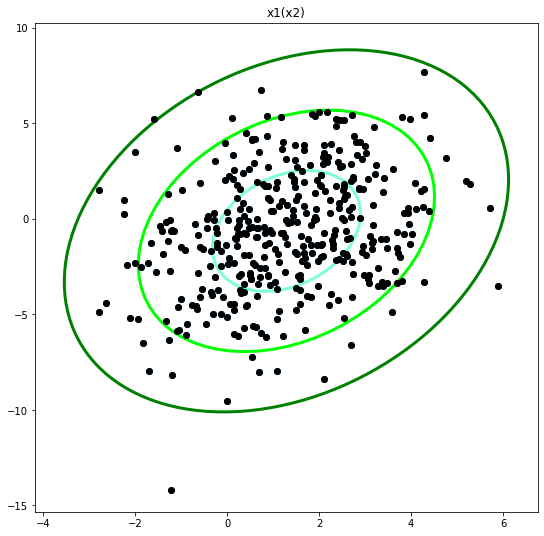

In [142]:
conc_ellipse(df.x1, df.x2, title='x1(x2)')

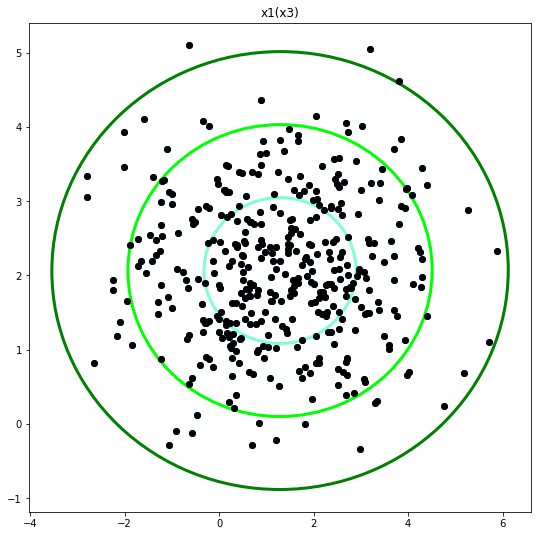

In [143]:
conc_ellipse(df.x1, df.x3, title='x1(x3)')

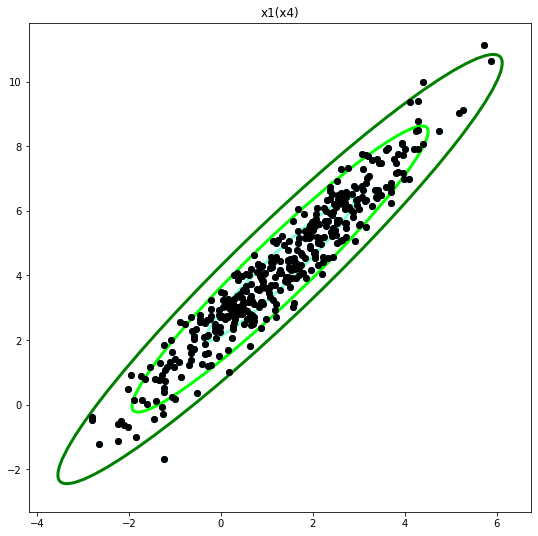

In [144]:
conc_ellipse(df.x1, df.x4, title='x1(x4)')

Линейные преобразования нсв

In [107]:
k1, k2, k3, k4 = 4, 10, 3, 2

In [108]:
df_for_part_4 = df.copy()
df_for_part_4['y1'] = k1 * df_for_part_4.x1 + k3 * df_for_part_4.x3
df_for_part_4['y2'] = k2 * df_for_part_4.x2 + k4 * df_for_part_4.x4
df_for_part_4.head()

,x1,x2,x3,x4,y1,y2
0,2.129681,1.439458,1.781273,5.597965,13.862540,25.590509
1,0.572235,2.902113,3.068484,2.666525,11.494394,34.354181
2,1.303781,0.720650,1.659750,4.072094,10.194373,15.350691
3,-0.449557,0.010528,2.895687,2.645260,6.888835,5.395795
4,0.047289,2.251093,2.816285,3.236669,8.638012,28.984268


In [122]:
print('MEAN\n')
print('Empirical: \n')
print('mean(y1) = ' + str(np.mean(df_for_part_4.y1)))
print('mean(y2) = ' + str(np.mean(df_for_part_4.y2)))
print('\nTeoretical: \n')
print(z)
print('mean(y1) = ' + str(k1 * df_for_part_4.x1.mean() + k3 * df_for_part_4.x3.mean()))
print('mean(y2) = ' + str(k2 * df_for_part_4.x2.mean() + k4 * df_for_part_4.x4.mean()))

MEAN

Empirical: 

mean(y1) = 11.344053556257409
mean(y2) = 2.085245770095766

Teoretical: 

11.34405355625741
mean(y1) = 11.34405355625741
mean(y2) = 2.0852457700957654


In [123]:
print('Empirical:')
pd.DataFrame(np.cov(df_for_part_4.y1, df_for_part_4.y2))

Empirical:


,0,1
0,50.275445,120.231663
1,120.231663,1097.176837


In [140]:
# C = np.array([[k1, k2], [k3, k4]])

# cov1 = np.cov(df['x1'], df['x3'])
# cov2 = np.cov(df['x2'], df['x4'])
# a = np.dot(np.dot(C[0], cov1), C[0])
# b = np.dot(np.dot(C[1], cov2), C[1])

# print(a, b)

138.47546045670987 133.375674836032


Смесь распределений

In [100]:
df_for_part_5 = df.copy()
p_ = 0.3
df_for_part_5['alpha'] = scs.bernoulli.rvs(size=len(df_for_part_5.x1),p=p_)
df_for_part_5['x5'] = df_for_part_5.alpha * df_for_part_5.x1 + (1 - df_for_part_5.alpha) * df_for_part_5.x2
df_for_part_5.head()

,x1,x2,x3,x4,alpha,x5
0,2.129681,1.439458,1.781273,5.597965,1,2.129681
1,0.572235,2.902113,3.068484,2.666525,0,2.902113
2,1.303781,0.720650,1.659750,4.072094,0,0.720650
3,-0.449557,0.010528,2.895687,2.645260,0,0.010528
4,0.047289,2.251093,2.816285,3.236669,0,2.251093


In [101]:
print('Expected value: ' + str(df_for_part_5.x5.mean()) + '\nVariance: ' + str(df_for_part_5.x5.var()))

Expected value: -0.11853805689556848
Variance: 8.451175022534994


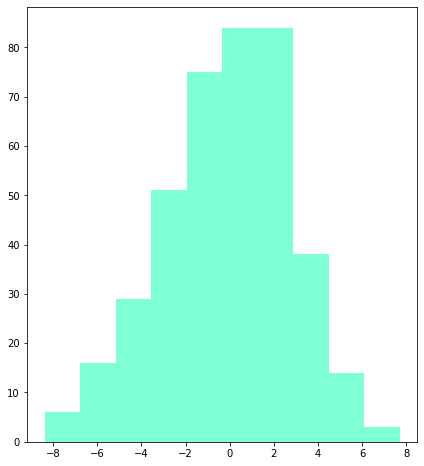

In [102]:
plt.figure(figsize = (7,8))
plt.hist(df_for_part_5.x5, color = 'aquamarine')
plt.show()

In [106]:
cal_mean = df_for_part_5.x1.mean() * p_ + df_for_part_5.x2.mean() * (1 - p_)
print('Calculated mean: ' + str(cal_mean))
cal_var = sum([pi * (xi.var() + xi.mean()**2 - cal_mean**2) 
                for pi,xi in zip([p_,(1-p_)],[df.x1,df.x2])])
print('Calculated var: ' + str(cal_var))

Calculated mean: -0.055286382734511086
Calculated var: 8.534519662336002
